In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st
from scipy import stats
from scipy.stats import norm

In [75]:
df = pd.read_csv("melb_data.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## Nomor 1


In [74]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,-37.408530,145.526350,21650.000000


In [80]:
df["Date"] = pd.to_datetime(df["Date"])
df["YearBuilt"] = pd.to_datetime(df["YearBuilt"])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [22]:

print(df['Distance'].mean())
print(df['Distance'].median())
print(df['Distance'].mode())
print(df['Distance'].var())
print(df['Distance'].std())




10.137776141384117
9.2
0    11.2
dtype: float64
34.44193245743184
5.868724943071692


**a) Kolom Price**


    Central Tendency
    1) nilai mean price sebesar : 1075684.079455081 yang dapat diartikan nilai rata-rata pada kolom price yang berjumlah 13580 data
    
    2) nilai median price sebesar : 903000.0 yang berada pada titik tengah pesebaran data yang berjumlah 13580 data (berada pada range 50% dari keseluruhan data)
    
    3) nilai mode sebesar : 1100000 yang dapat diartikan bahwa nilai tersebut mengalami bisa dikatan memiliki frequensi yang paling besar dari nilai yang lain atau sering muncul
    
    Dispersion
    1) nilai variance sebesar : 408.718.202.199,90 menunjukan bahwa total keragaman atau variasi yang data pada distribusi kolom price sebesar 408.718.202.199,90
    2) nilai std sebesar  : 639310.72 nilai tersebut menunjukan jarak perbedaan/selisih dari setiap data terhadap mean yang ada

**b) Kolom Landsize**


    Central Tendency
    1) nilai mean Landsize sebesar : 558.41 yang dapat diartikan nilai rata-rata pada kolom price yang berjumlah 13580 data
    
    2) nilai median Landsize sebesar : 440.0 yang berada pada titik tengah pesebaran data yang berjumlah 13580 data (berada pada range 50% dari keseluruhan data)
    
    3) nilai mode Landsize sebesar : 0.0 yang dapat diartikan bahwa nilai tersebut mengalami bisa dikatan memiliki frequensi yang paling besar dari nilai yang lain atau sering muncul
    
    Dispersion
    1) nilai variance sebesar : 15925440.99 menunjukan bahwa total keragaman atau variasi yang data pada distribusi kolom price sebesar 408.718.202.199,90
    2) nilai std sebesar  : 3990.66 nilai tersebut menunjukan jarak perbedaan/selisih dari setiap data terhadap mean yang ada

**c) Kolom Distance**


    Central Tendency
    1) nilai mean Landsize sebesar : 10.13 yang dapat diartikan nilai rata-rata pada kolom price yang berjumlah 13580 data
    
    2) nilai median Landsize sebesar : 9.2 yang berada pada titik tengah pesebaran data yang berjumlah 13580 data (berada pada range 50% dari keseluruhan data)
    
    3) nilai mode Landsize sebesar : 11.2 yang dapat diartikan bahwa nilai tersebut mengalami bisa dikatan memiliki frequensi yang paling besar dari nilai yang lain atau sering muncul
    
    Dispersion
    1) nilai variance sebesar : 34.44 menunjukan bahwa total keragaman atau variasi yang data pada distribusi kolom price sebesar 408.718.202.199,90
    2) nilai std sebesar  : 5.86 nilai tersebut menunjukan jarak perbedaan/selisih dari setiap data terhadap mean yang ada

In [30]:
stats.skewtest(df[['Landsize', 'Distance', 'Price']])
print(f'normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(df['Landsize']))
print(f'normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(df['Distance']))
print(f'normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(df['Price']))


normal skewtest teststat = 212.046 pvalue = 0.0000
normal skewtest teststat = 57.048 pvalue = 0.0000
normal skewtest teststat = 67.410 pvalue = 0.0000


In [34]:
n, p = stats.normaltest(df['Landsize'])
n, p = stats.normaltest(df['Price'])
n, p = stats.normaltest(df['Distance'])


In [32]:
alpha = 0.001
for i in ['Landsize', 'Distance', 'Price']:
    teststat1, p = stats.normaltest(df[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f'Kolom {i} Tidak Terdistribusi Normal')
    else:
        print(f'Kolom {i} Terdistribusi Normal')


Kolom Landsize Tidak Terdistribusi Normal
Kolom Distance Tidak Terdistribusi Normal
Kolom Price Tidak Terdistribusi Normal


## Nomor 2


In [35]:
def cari_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

In [44]:
'''
Berikut ini merupakan nilai - nilai pada kolom landsize yang tergolong data outlier atau data yang menyimpan dari rata-rata
banyak sekali ukuran(luas) bangunan yang sangat signifikan berbeda dari rata2 bangunan yang ada 
'''
cari_outlier(df['Landsize'])

[4290.0,
 1581.0,
 2113.0,
 1491.0,
 2471.0,
 1957.0,
 1472.0,
 1801.0,
 2051.0,
 1468.0,
 1437.0,
 1611.0,
 1364.0,
 75100.0,
 4931.0,
 1572.0,
 1561.0,
 4668.0,
 4676.0,
 2120.0,
 1393.0,
 2886.0,
 15900.0,
 2773.0,
 3701.0,
 1777.0,
 1484.0,
 1764.0,
 1966.0,
 2381.0,
 2925.0,
 1622.0,
 1547.0,
 10100.0,
 1658.0,
 2782.0,
 4332.0,
 2778.0,
 4296.0,
 4296.0,
 4296.0,
 2077.0,
 2794.0,
 8680.0,
 1783.0,
 1485.0,
 3056.0,
 1996.0,
 1402.0,
 1504.0,
 3414.0,
 1585.0,
 1997.0,
 3132.0,
 1568.0,
 3194.0,
 3977.0,
 4267.0,
 4440.0,
 3448.0,
 3957.0,
 2136.0,
 1972.0,
 15100.0,
 5661.0,
 3967.0,
 1396.0,
 37000.0,
 4977.0,
 3014.0,
 3014.0,
 4230.0,
 1414.0,
 4051.0,
 1751.0,
 1388.0,
 2026.0,
 2187.0,
 1981.0,
 1660.0,
 2522.0,
 1588.0,
 2300.0,
 1882.0,
 1390.0,
 2469.0,
 2427.0,
 2488.0,
 2431.0,
 2401.0,
 2193.0,
 21700.0,
 2166.0,
 2166.0,
 2166.0,
 6866.0,
 5042.0,
 1768.0,
 1958.0,
 8216.0,
 3037.0,
 1485.0,
 4679.0,
 41400.0,
 8223.0,
 1725.0,
 2571.0,
 2740.0,
 7455.0,
 8223.0,
 35

In [41]:
'''
Jumlah data outlier
'''
outlier = cari_outlier(df['Landsize'])
len(outlier)

368

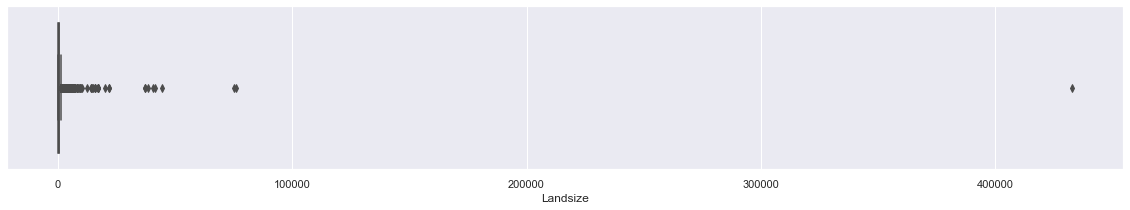

In [53]:
'''
Bedasarkan gambar dibawah data outlier ditunjukan denggan titik yang berada pada luar diagram dengan jumlah 368 outlier

'''
plt.subplots(figsize=(20,3))
sns.set(rc={'figure.figsize':(8,11)})
sns.boxplot(x='Landsize', data=df)

In [49]:
'''
Berikut ini merupakan nilai - nilai pada kolom Distance yang tergolong data outlier atau data yang menyimpan dari rata-rata
'''
cari_outlier(df['Distance'])

[35.2,
 25.0,
 34.7,
 24.7,
 24.7,
 24.7,
 25.9,
 38.0,
 36.9,
 38.0,
 45.9,
 32.3,
 45.2,
 25.2,
 25.2,
 31.7,
 31.7,
 25.9,
 25.9,
 34.1,
 34.1,
 23.8,
 23.5,
 35.4,
 34.7,
 31.7,
 31.7,
 31.7,
 27.0,
 25.5,
 25.5,
 27.2,
 27.0,
 25.0,
 25.0,
 25.0,
 25.0,
 31.2,
 31.2,
 31.2,
 31.2,
 27.0,
 27.0,
 24.7,
 24.7,
 24.7,
 28.8,
 24.8,
 24.8,
 38.0,
 36.9,
 32.3,
 25.2,
 31.7,
 29.8,
 31.7,
 26.5,
 26.5,
 23.5,
 35.4,
 31.7,
 31.7,
 35.2,
 34.9,
 34.9,
 24.7,
 24.7,
 24.8,
 45.9,
 32.3,
 41.0,
 31.7,
 29.8,
 25.9,
 25.9,
 26.5,
 26.5,
 23.5,
 23.5,
 35.4,
 34.7,
 31.7,
 39.8,
 35.2,
 31.2,
 27.0,
 24.7,
 38.0,
 38.0,
 38.0,
 38.0,
 25.2,
 31.7,
 29.8,
 29.8,
 31.6,
 34.1,
 47.3,
 47.4,
 23.5,
 34.7,
 35.4,
 34.6,
 31.7,
 35.2,
 35.2,
 34.9,
 27.1,
 24.7,
 24.7,
 27.7,
 27.0,
 27.0,
 24.8,
 24.8,
 38.0,
 38.0,
 38.0,
 38.0,
 33.3,
 25.2,
 31.7,
 29.8,
 31.7,
 35.4,
 34.6,
 31.7,
 29.3,
 25.5,
 37.5,
 35.2,
 35.2,
 25.0,
 25.0,
 34.9,
 34.7,
 24.7,
 24.7,
 24.7,
 27.0,
 24.8,
 24.8,
 38.0,

In [50]:
'''
Jumlah data outlier
'''
outlier = cari_outlier(df['Distance'])
len(outlier)

411

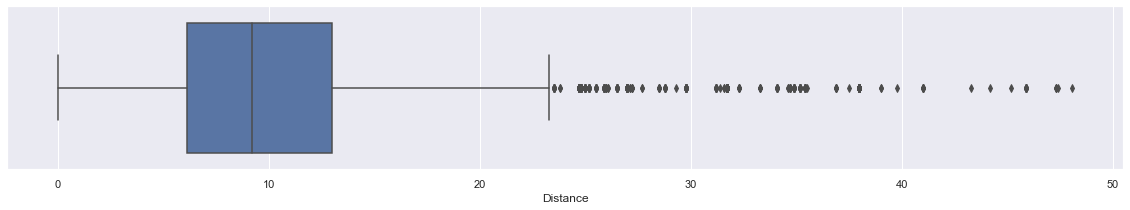

In [52]:
'''
Bedasarkan gambar dibawah data outlier ditunjukan denggan titik yang berada pada luar diagram dengan jumlah 411 outlier.
Dari gambar boxplot di atas,tampak dengan mean yg agak ke arah kiri.
dan menunjukan bahwa 
'''

sns.set(rc={'figure.figsize':(8,11)})
sns.boxplot(x='Distance', data=df)

## Nomor 3

'\nJika dilihat pada diagram dibawha terlihat bahwa distrbusi pada kolom landsize tidak normal karena jika\ndilihat dari range tanah yang berada pada kisaran 0-100.000 sangat mendominasi dan jika dilihat secara seksama garis kde tidak menunjukan bell curve\n'

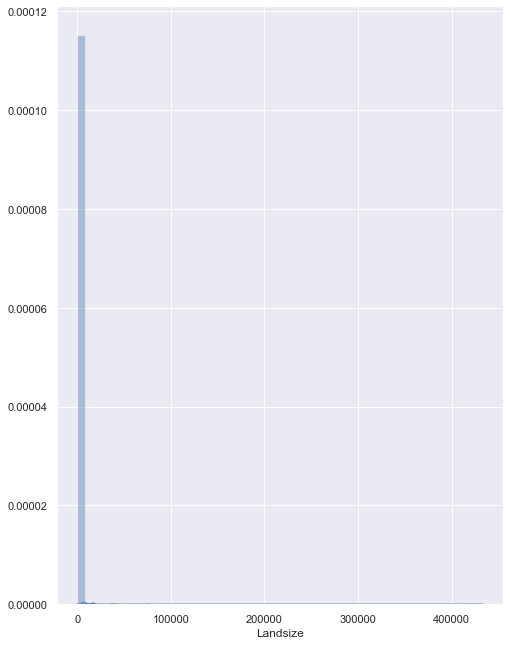

In [90]:
sns.set(rc={'figure.figsize':(8,11)})
sns.distplot(df['Landsize'])

'''
Jika dilihat pada diagram dibawha terlihat bahwa distrbusi pada kolom landsize tidak normal karena jika
dilihat dari range tanah yang berada pada kisaran 0-100.000 sangat mendominasi dan jika dilihat secara seksama garis kde tidak menunjukan bell curve
'''



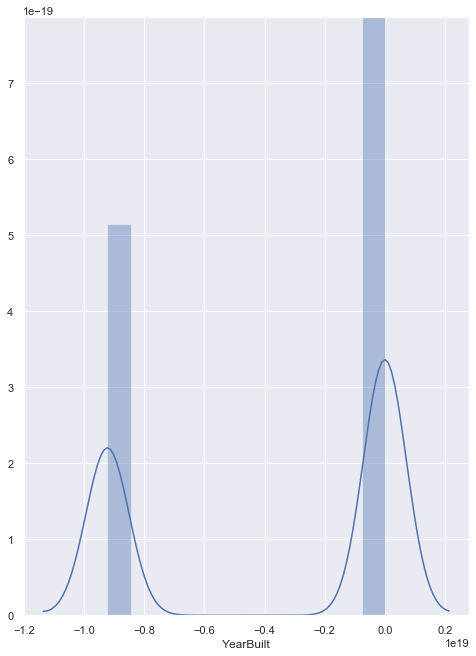

In [79]:
'''
Jika dilihat pada diagram dibawah, dapat dikatan distubusi pada kolom year built dikatan normat karena 
salah satunya KDE berbentuk bell curve
'''
sns.set(rc={'figure.figsize':(8,11)})
sns.distplot(df['YearBuilt'])



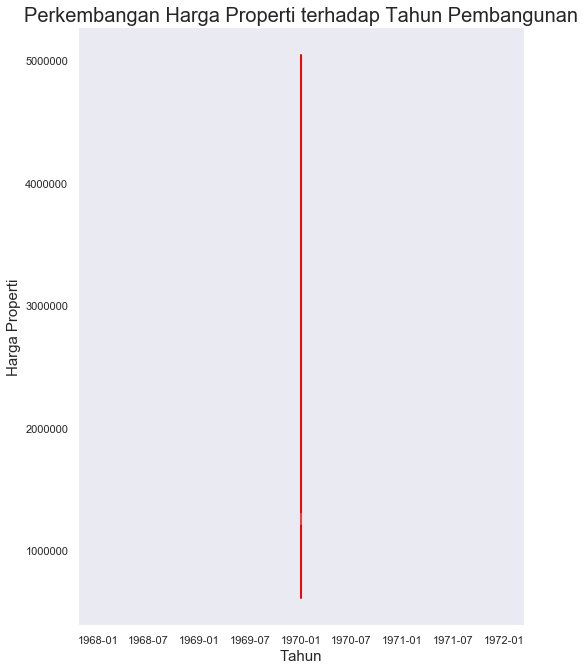

In [95]:
x = df_meanyear1['YearBuilt']
y = df_meanyear1['Price']
plt.plot(x, y, 'red')
plt.title('Perkembangan Harga Properti terhadap Tahun Pembangunan', size=20) 
plt.xlabel('Tahun', size=15) #keterangan sumbu x
plt.ylabel('Harga Properti', size=15) # keterangan sumbu y
plt.grid() #menambahkan grid
plt.show()

In [ ]:
'''

Terlihat pada diagram diaatas bahwa dominasi kisaran pembangunan rumah berada di tahun 1970 tepatnya pada 1970 bulan 1
Namun rumah yang di bangun pada kisaran tahun 1800 - 1900 terjadi perubahan trend yang menunjukan bahwa properti tersebut mengalami kenaikan seiring dengan naiknya Tahun Pembuatan.
Tetapi trend kembali berubah seperti di awal properti yang di bangun diatas tahun 1900 terus mengalami penurunan harga seiring bertambahnya tahun pembuatan
'''

## Nomor 5

Text(0.5, 1, 'Corellation Between Features :  Landsize, Distance & Rooms')

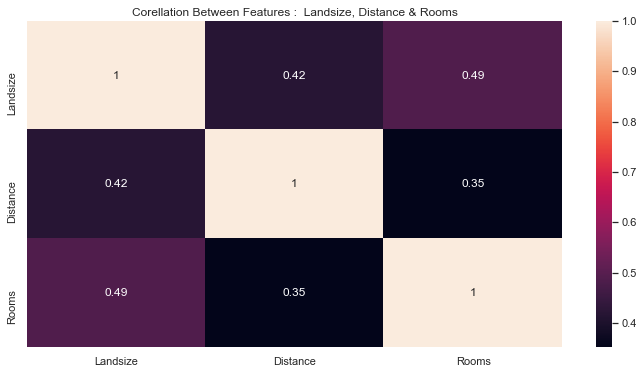

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['Landsize','Distance','Rooms']].corr('spearman'), annot = True)
plt.title('Corellation Between Features :  Landsize, Distance & Rooms')

In [ ]:
'''
pada diagram diatas menunjukan bahwa ketiga kolom tidak ada yang memiliki korelasi 
dengan nilai korelasi yang tidak mendekati angka 1.

Alasan mengunakan metodh spearman adalah data tidak terdistribusi normal untuk ketiga kolom.

sifat datanya yaitu continue

Range korelasi dari 0 sampai 1, jika nalai mendekati 1 semakin kuat pula korelasinya, 
Artinya saat mendakati 1 fitur yang dibandingan dengan fitur lain 
sama-sama memiliki peranan kuat untuk mempengaruhi nilai satu sama lain. 
'''